In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

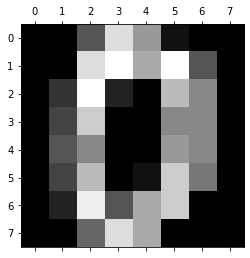

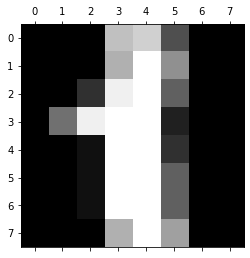

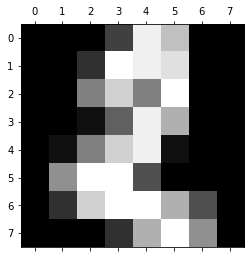

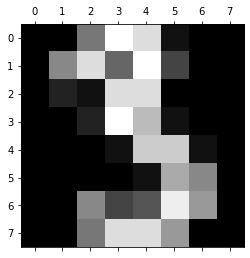

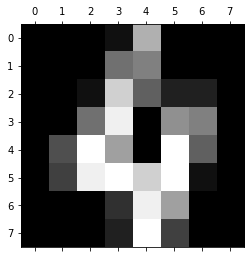

In [6]:
plt.gray()
for img in digits.images[:5]:
    plt.matshow(img)

In [7]:
digits.target[:5]

array([0, 1, 2, 3, 4])

### Split Train and Test Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [10]:
len(X_train)

1437

In [11]:
len(X_test)

360

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.score(X_test, y_test)

0.9694444444444444

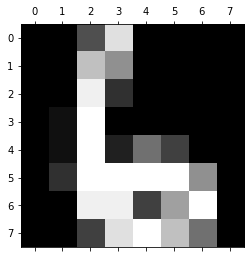

In [16]:
plt.matshow(digits.images[67])

In [17]:
model.predict([digits.data[67]])

array([6])

In [18]:
y_test[:10]

array([6, 3, 6, 0, 7, 5, 1, 8, 4, 2])

In [19]:
model.predict(X_test[:10])

array([6, 3, 6, 0, 7, 5, 1, 8, 4, 2])

### Confusion Matrix & Classification Report

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
y_predicted = model.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 35,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  1, 27]], dtype=int64)

Text(69.0, 0.5, 'Truth')

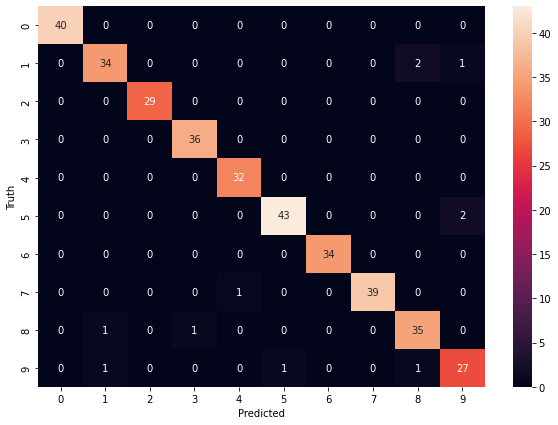

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [26]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.94      0.92      0.93        37
           2       1.00      1.00      1.00        29
           3       0.97      1.00      0.99        36
           4       0.97      1.00      0.98        32
           5       0.98      0.96      0.97        45
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.99        40
           8       0.92      0.95      0.93        37
           9       0.90      0.90      0.90        30

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### When To use

Logistic Regression is used when the dependent variable(target) is categorical.

For example,

1. To predict whether an email is spam (1) or (0)
2. Whether the tumor is malignant (1) or not (0)

#### Types of Logistic Regression

1. Binary Logistic Regression

The categorical response has only two 2 possible outcomes. Example: Spam or Not

2. Multinomial Logistic Regression

Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3. Ordinal Logistic Regression

Three or more categories with ordering. Example: Movie rating from 1 to 5


### Pros

1. One of the simplest machine learning algorithms.
2. 

### Cons

1. Non linear problems can't be solved
2. It is difficult to capture complex relationships
3. It requires moderate or no multicollinearity between independent variables